In [1]:
# Dependencies and Setup

%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Files to Load

demo_file = "age_gender_bkts.csv"

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read Age File and store into Pandas data frame
demo_data = pd.read_csv(demo_file)
demo_data.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [3]:
demo_group = demo_data.groupby(['age_bucket', 'gender'], as_index=False).sum()
demo_group.sort_values(by=['age_bucket'])
demo_group.drop(['year'], axis=1)

,age_bucket,gender,population_in_thousands
0,0-4,female,20861.0
1,0-4,male,21925.0
2,10-14,female,20640.0
3,10-14,male,21604.0
4,100+,female,145.0
5,100+,male,30.0
6,15-19,female,21177.0
7,15-19,male,22170.0
8,20-24,female,22504.0
9,20-24,male,23579.0


In [4]:
demo_pivot = demo_group.pivot(index='age_bucket', columns='gender', values='population_in_thousands')
demo_pivot.reindex(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'])

gender,female,male
age_bucket,,
0-4,20861.0,21925.0
5-9,20753.0,21724.0
10-14,20640.0,21604.0
15-19,21177.0,22170.0
20-24,22504.0,23579.0
25-29,23434.0,24287.0
30-34,23993.0,24415.0
35-39,23527.0,23727.0
40-44,24588.0,24582.0


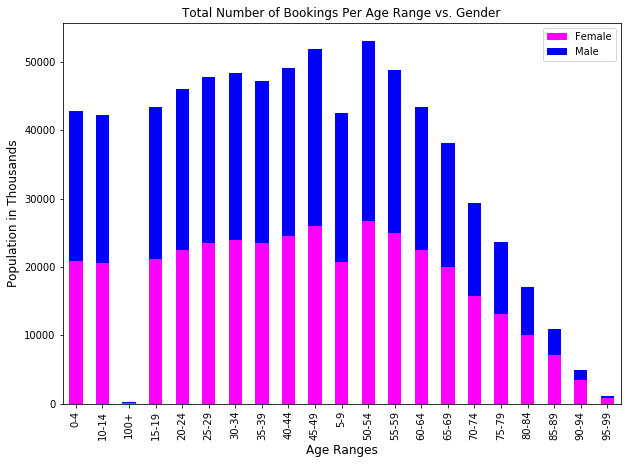

<Figure size 432x288 with 0 Axes>

In [5]:
demo_pivot.sort_values("age_bucket").plot.bar(stacked=True, figsize=(10,7), color=['magenta', 'blue'])
plt.title('Total Number of Bookings Per Age Range vs. Gender', fontsize=12)
plt.ylabel('Population in Thousands', fontsize=12)
plt.xlabel('Age Ranges', fontsize=12)
plt.legend(['Female', 'Male'])
plt.show()
plt.savefig("Age_vs_Gender.png")